In [3]:
import os
import json
import pandas as pd
from typing import DefaultDict, Dict, List, Any
from collections import defaultdict

from draco import Draco

import matplotlib.pyplot as plt


default_draco = Draco()

In [9]:
def pairs_to_bitmap(specs):

    bitmap: DefaultDict[str, int] = defaultdict(int)

    for example in specs:
        neg_feature_vec = default_draco.count_preferences(example["negative"])
        pos_feature_vec = default_draco.count_preferences(example["positive"])
        feature_names = default_draco.soft_constraint_names

        for feature in feature_names:
            if feature not in bitmap:
                bitmap[feature] = 0
            bitmap[feature] += abs(neg_feature_vec[feature] - pos_feature_vec[feature])

    return list(bitmap.values())


json_files = [
    pos_json for pos_json in os.listdir("./data_new/") if pos_json.endswith(".json")
]

num_files = len(json_files)
feature_matrix = []
file_names = []

specs: List[Dict[str, List]] = []

for i in range(0, num_files):
    json_file = json_files[i]
    fr = open("./data_new/" + json_file, "r")
    fdata = json.load(fr)
    file_names.append(json_file.split(".")[0])

    feature_matrix.append(pairs_to_bitmap(fdata))

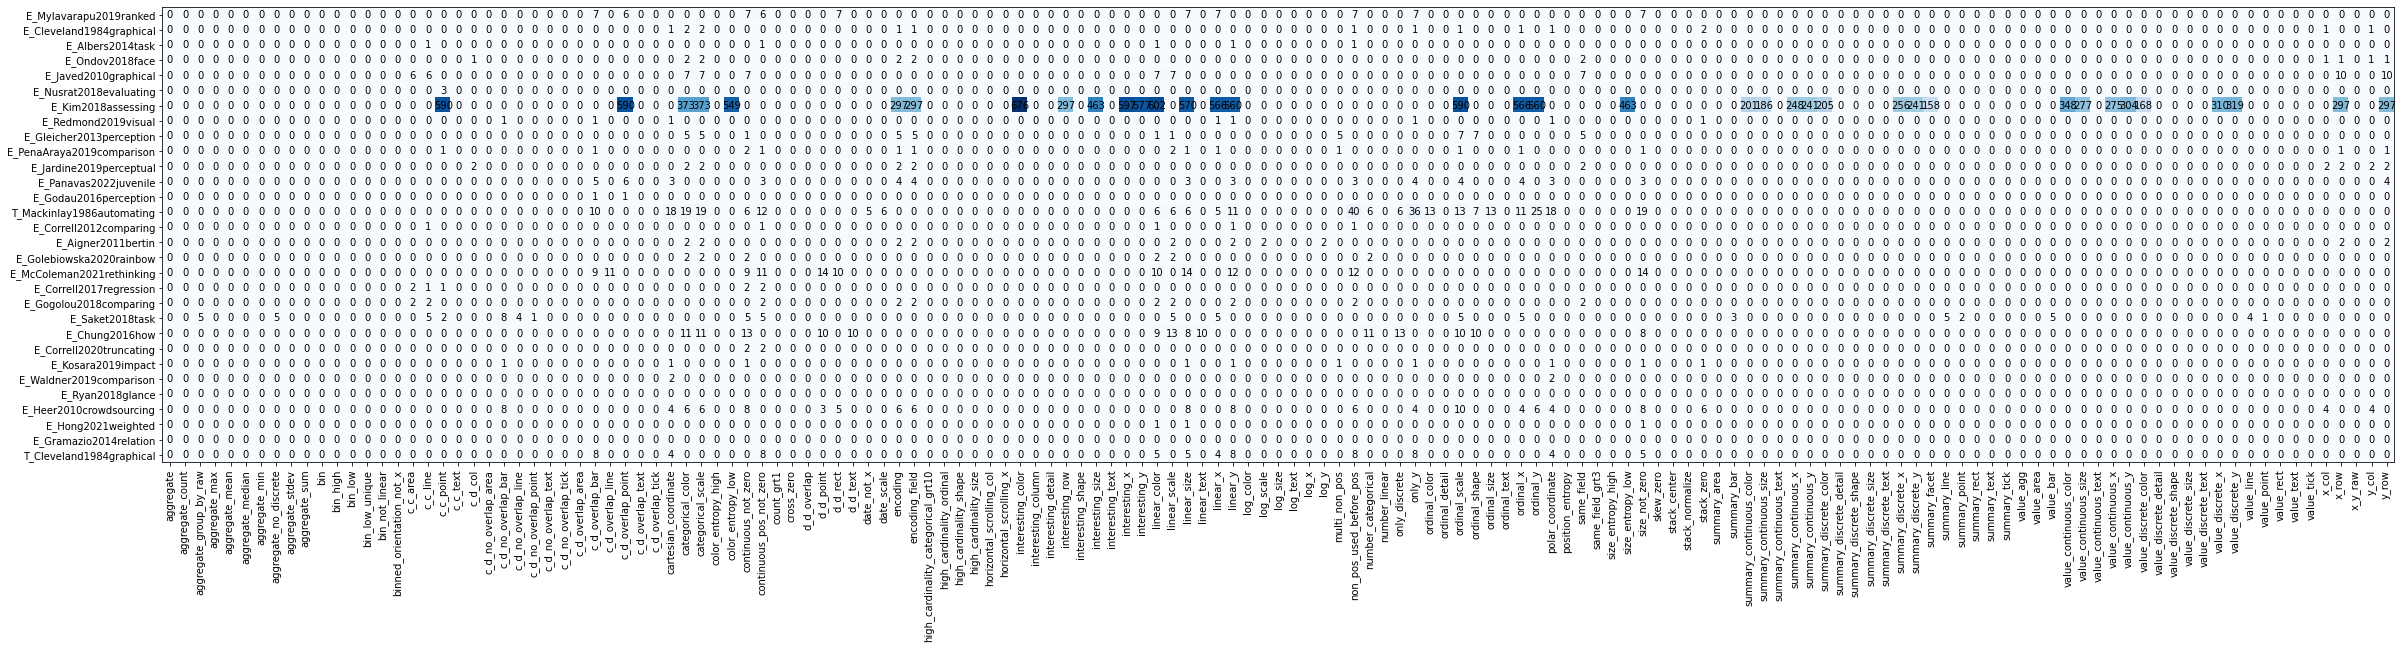

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
from scipy import stats
from scipy.cluster import hierarchy
from sklearn import datasets

fig, ax = plt.subplots()

ax.matshow(feature_matrix, cmap=plt.cm.Blues)
plt.gca().xaxis.tick_bottom()
feature_names = default_draco.soft_constraint_names

for i in range(len(file_names)):
    for j in range(len(feature_names)):
        c = feature_matrix[i][j]
        ax.text(j, i, str(c), va="center", ha="center")

x_positions = list(range(len(feature_names)))
ax.xaxis.set_ticks(x_positions)
ax.xaxis.set_ticklabels(feature_names)
plt.xticks(rotation=90)

y_positions = list(range(len(file_names)))
ax.yaxis.set_ticks(y_positions)
ax.yaxis.set_ticklabels(file_names)

fig.set_size_inches(40, 30)